<a href="https://colab.research.google.com/github/son50git/PKT_004_Visualizaiton_PY_MTL/blob/master/PKT_004_Rework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sr = pd.Series([10, 25, 3, 11, 24, 6])
index_ = ['Coca Cola', 'Sprite', 'Coke', 'Fanta', 'Dew', 'ThumbsUp']
sr.index = index_
print(sr)
result = sr.rolling(2).sum()
print(result)

result = sr.rolling(2, min_periods=1).sum()
print(result)

Coca Cola    10
Sprite       25
Coke          3
Fanta        11
Dew          24
ThumbsUp      6
dtype: int64
Coca Cola     NaN
Sprite       35.0
Coke         28.0
Fanta        14.0
Dew          35.0
ThumbsUp     30.0
dtype: float64
Coca Cola    10.0
Sprite       35.0
Coke         28.0
Fanta        14.0
Dew          35.0
ThumbsUp     30.0
dtype: float64


In [3]:
from google.colab import drive, files
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
uploaded = files.upload()

Saving movie.csv to movie.csv


In [5]:
movie = pd.read_csv('movie.csv')
print(movie.shape)
print(movie.columns)
movie.head()

(4916, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
print(type(med_budget))
med_budget

<class 'pandas.core.series.Series'>


title_year
1916.0     0.385907
1920.0     0.100000
1925.0     0.245000
1927.0     6.000000
1929.0     0.379000
            ...    
2012.0    17.000000
2013.0    20.000000
2014.0    15.000000
2015.0    14.400000
2016.0    22.500000
Name: budget, Length: 91, dtype: float64

In [7]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()  # Provide rolling window calculations
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [8]:
print(med_budget.loc[2012:2016].mean()) # 17.78  # 2012, don't worry about the decimal point
print(med_budget.loc[2011:2015].mean()) # 17.98
print(med_budget.loc[2010:2014].mean()) # 19.10

17.78
17.98
19.1


In [9]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [10]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

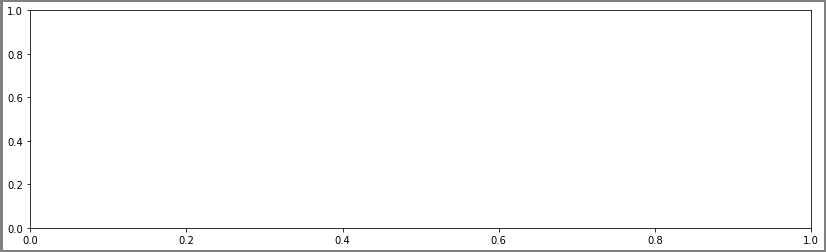

In [11]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
# text_kwargs=dict(fontsize=20, family='cursive')
# ax.set_title('Median Movie Budget', **text_kwargs)
# ax.set_ylabel('Millions of Dollars', **text_kwargs)

Text(0, 0.5, 'Millions of Dollars')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


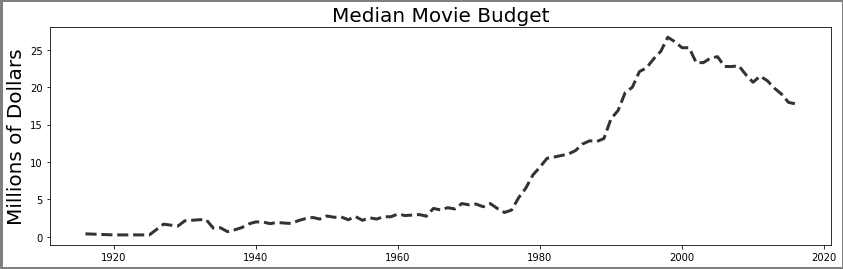

In [12]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')  # plot() assumes the index as x= unless specified # label for the legend()
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)  # ** means a dict format
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [13]:
movie_count = movie.groupby('title_year')['budget'].count()   
print(movie_count.tail())

movie_count2 = movie.groupby('title_year')['gross'].count()   
# why count values are different from each other?  presumably 
# because of some missing values (np.nan for numeric, '' and ' ' don't count for categorical)
print(movie_count2.tail())

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64
title_year
2012.0    174
2013.0    181
2014.0    159
2015.0    131
2016.0     69
Name: gross, dtype: int64


In [14]:
# print(type(movie_count)) # pandas.core.series.Series

ct = movie_count.values
# print(type(ct)) # numpy.ndarray
print(ct.max()) # 221

# budget = med_budget_roll.values  -- defined earlier
print(budget.max()) # 26.7

221
26.7


In [15]:
ct_norm = ct / ct.max() * budget.max()  # very interesting normalization

print(ct[:10])
print(ct_norm[:10])

[1 1 1 1 1 1 1 2 1 1]
[0.12081448 0.12081448 0.12081448 0.12081448 0.12081448 0.12081448
 0.12081448 0.24162896 0.12081448 0.12081448]


In [16]:
print(type(years))
years

<class 'numpy.ndarray'>


array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [17]:
fifth_year = (years % 5 == 0) & (years >= 1970)  # return the truth value # multiple conditions joined-- (cond1) & (cond2)
fifth_year
# years_5 = years[fifth_year]
# ct_5 = ct[fifth_year]
# ct_norm_5 = ct_norm[fifth_year]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False])

In [18]:
years_5 = years[fifth_year]  # truth values imposed on ndarray, returning another ndarray
print(len(years_5))
print(years_5)
ct_5 = ct[fifth_year]
print(ct_5)
ct_norm_5 = ct_norm[fifth_year]
print(ct_norm_5)

10
[1970. 1975. 1980. 1985. 1990. 1995. 2000. 2005. 2010. 2015.]
[ 12   6  21  27  28  67 163 198 192 192]
[ 1.44977376  0.72488688  2.53710407  3.26199095  3.38280543  8.09457014
 19.69276018 23.92126697 23.19638009 23.19638009]


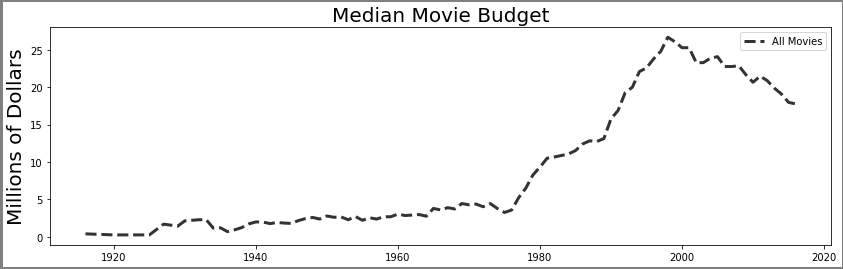

In [19]:
# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax.legend()
fig

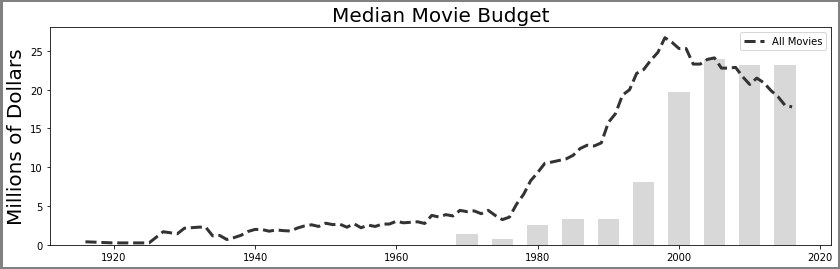

In [20]:
# Axes.bar(self, x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
# alpha=, Set the alpha transparency of the patch # between 0 (fully transparent, lighter) and 1 (fully opaque, darker)
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year') # don't see much diff. between alpha=.7 and alpha=.3

# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
fig

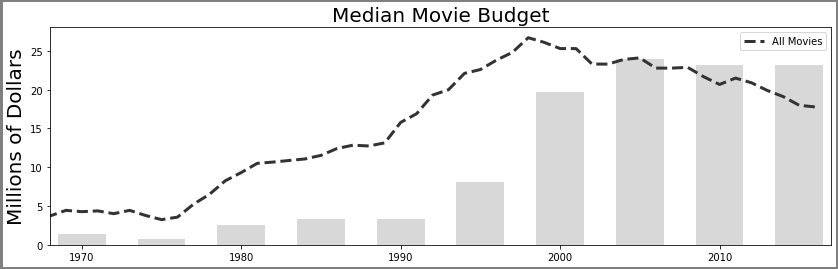

In [21]:
ax.set_xlim(1968, 2017)  # applicable to the same ax # syntactic style diff. (e.g: med_budget.loc[2012:2016]
fig

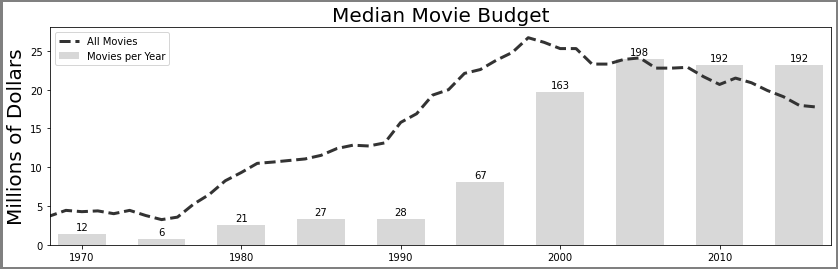

In [22]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):  # assumed: ct_norm_5 & ct_5 pattern is linear
    # the first 2 positions for the coordinates
    # use v instead of either y or y + 0.5 for visibility reason
    ax.text(x, y + 0.5, str(v), ha='center') # ha='horizontal alignment' # ['center'|'right'|'left']
ax.legend()
fig

In [23]:
# for Series examples
print(type(med_budget)) # Series
print(type(med_budget.loc[2010:2014])) # Series
print(type(med_budget.loc[2010:2014].mean()))  # float

# for DatFrame examples
print(type(movie.sort_values('budget', ascending=False)))  # DataFrame
print(type(movie.sort_values('budget', ascending=False).groupby('title_year')['budget']))  # SeriesGroupBy
print(type(movie.sort_values('budget', ascending=False).groupby('title_year')['budget'].mean())) # Series

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'float'>
<class 'pandas.core.frame.DataFrame'>
pandas.core.groupby.generic.SeriesGroupBy
<class 'pandas.core.series.Series'>


In [24]:
# tmp = movie.sort_values('budget', ascending=False).groupby('title_year')['budget']
tmp = movie.groupby(['title_year'])['budget'].count()
tmp

title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      1
         ... 
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, Length: 91, dtype: int64

In [25]:
selected = movie.sort_values('budget', ascending=False).groupby('title_year')['budget'].apply(lambda x: x.count())  # x means all entity of a year
selected

title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      1
         ... 
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, Length: 91, dtype: int64

In [26]:
selected = movie.sort_values('budget', ascending=False).groupby('title_year')['budget'].count() # the equivalent to the above
selected

title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      1
         ... 
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, Length: 91, dtype: int64

In [27]:
select_10 = movie.sort_values('budget', ascending=False).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median() / 1e6)
select_10

title_year
1916.0      0.385907
1920.0      0.100000
1925.0      0.245000
1927.0      6.000000
1929.0      0.379000
             ...    
2012.0    214.500000
2013.0    200.000000
2014.0    179.000000
2015.0    175.500000
2016.0    176.500000
Name: budget, Length: 91, dtype: float64

In [28]:
select_10 = movie.sort_values('budget', ascending=True).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median() / 1e6)
select_10

title_year
1916.0    0.385907
1920.0    0.100000
1925.0    0.245000
1927.0    6.000000
1929.0    0.379000
            ...   
2012.0    0.200000
2013.0    0.055000
2014.0    0.087500
2015.0    0.112500
2016.0    2.500000
Name: budget, Length: 91, dtype: float64

In [29]:
selected = movie.sort_values('budget', ascending=True).groupby('title_year')['budget'].apply(lambda x: x.median() / 1e6)
selected

title_year
1916.0     0.385907
1920.0     0.100000
1925.0     0.245000
1927.0     6.000000
1929.0     0.379000
            ...    
2012.0    17.000000
2013.0    20.000000
2014.0    15.000000
2015.0    14.400000
2016.0    22.500000
Name: budget, Length: 91, dtype: float64

In [30]:
top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)
        
top10_roll = top10.rolling(5, min_periods=1).mean()  # the mean of the median
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

In [31]:
years

array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Text(0, 0.3, 'Millions of Dollars')

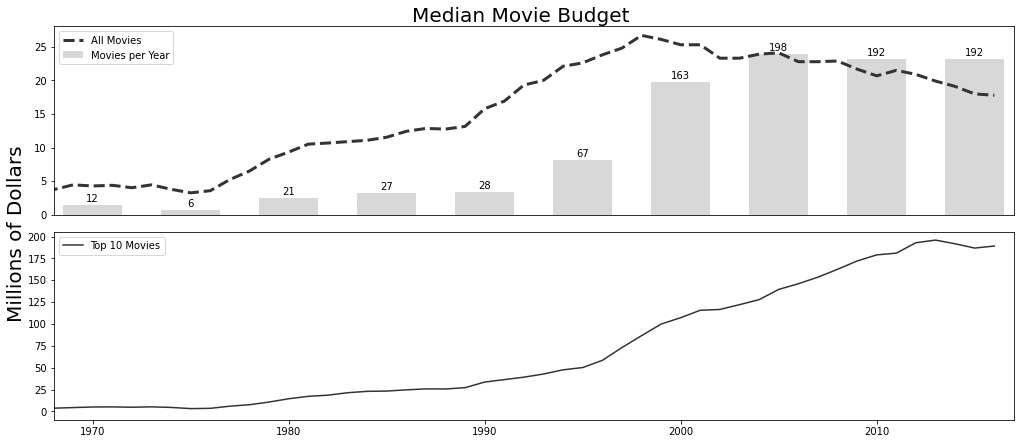

In [32]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True)  # x-ax of the top imposed on the bottom's
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False) # to be explained in future

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')  # years is ok because of subplot(sharex=True) above
ax2.legend(loc='upper left')

# text_kwargs=dict(fontsize=20, family='cursive'), as defined earlier
fig2.tight_layout()  # automatic adjustment of spaces
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .3, 'Millions of Dollars', rotation='vertical', ha='center', **text_kwargs)

In [33]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


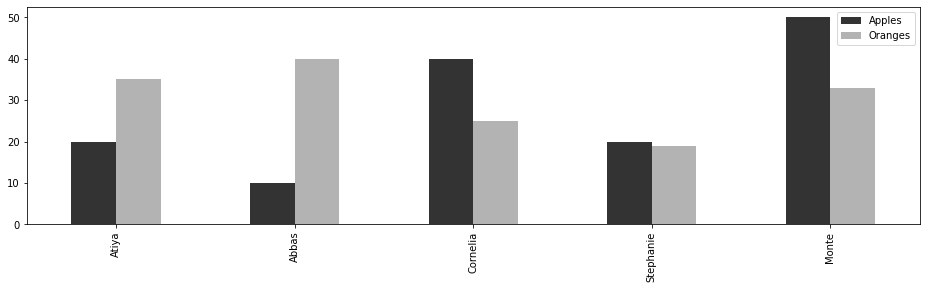

In [34]:
color = ["0.2", "0.7"]
df.plot(kind='bar', color=color, figsize=(16,4))  # be aware of the implicit assumpitons # df has two columns 

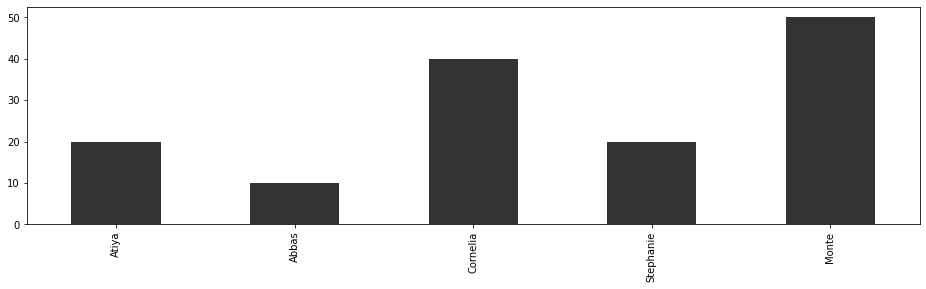

In [35]:
df.Apples.plot(kind='bar', color="0.2", figsize=(16,4)) # Series.plot(kind='bar')

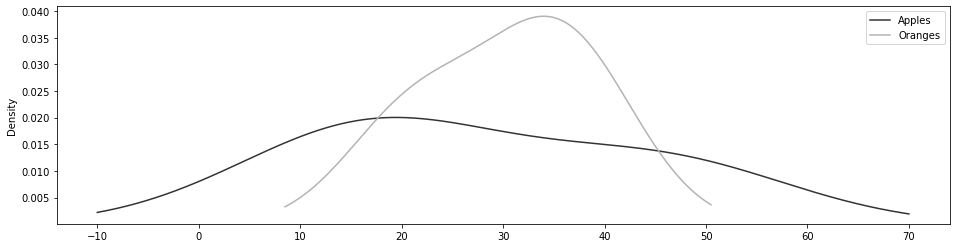

In [36]:
# KDE:  kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. 
# This function uses Gaussian kernels and includes automatic bandwidth determination.

df.plot(kind='kde', color=color, figsize=(16,4))

In [37]:
# three ways of plot()
# plt.plot()
# ax.plot()
# df.plot () or sr.plot(), with ax= option

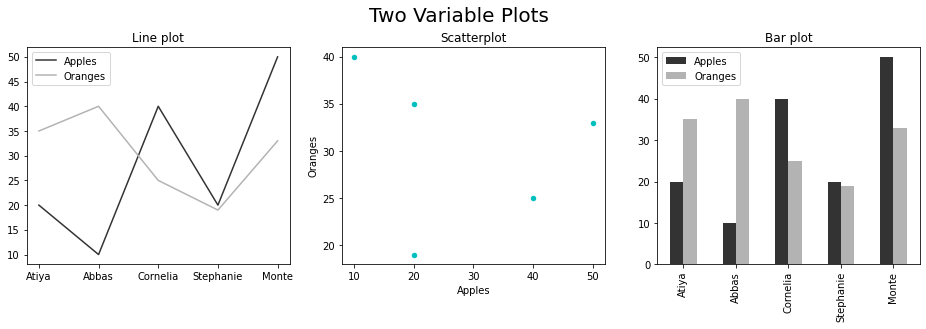

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', c='c' ,ax=ax2, title='Scatterplot') # c= for color
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

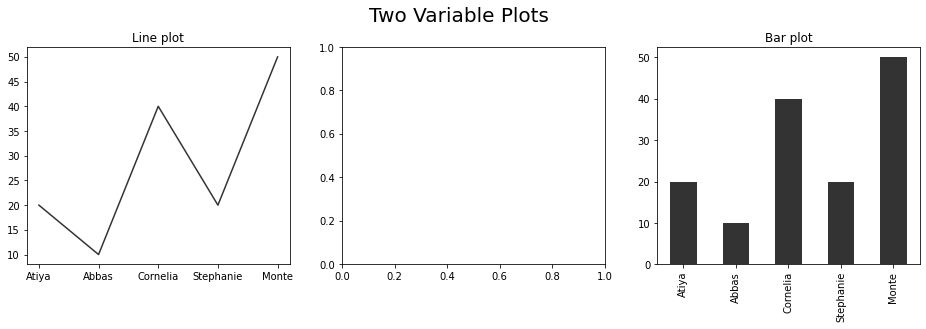

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.Apples.plot(kind='line', color="0.2", ax=ax1, title='Line plot')

df.Apples.plot(kind='bar', color="0.2", ax=ax3, title='Bar plot')

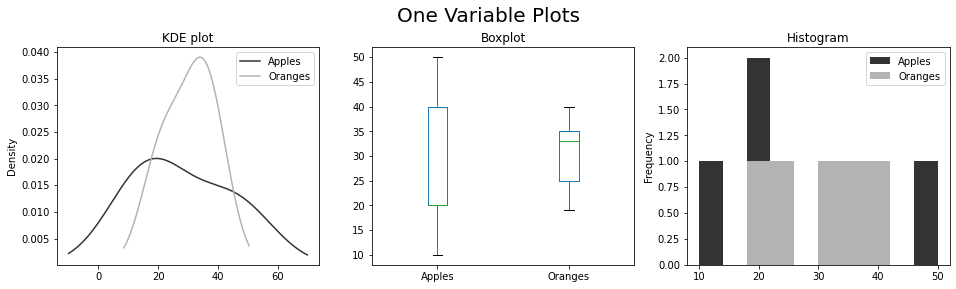

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

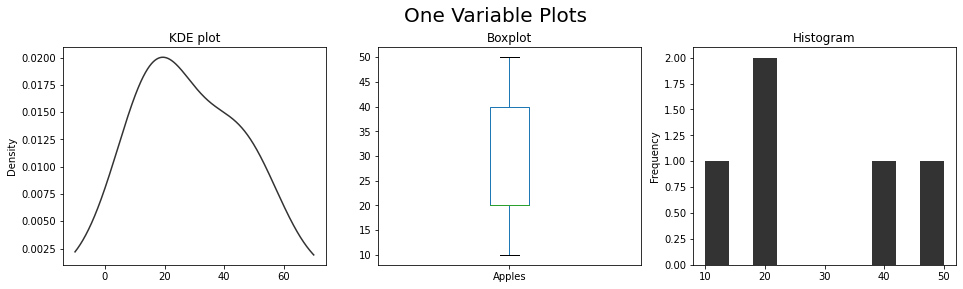

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.Apples.plot(kind='kde', color="0.2", ax=ax1, title='KDE plot')
df.Apples.plot(kind='box', ax=ax2, title='Boxplot')
df.Apples.plot(kind='hist', color="0.2", ax=ax3, title='Histogram')

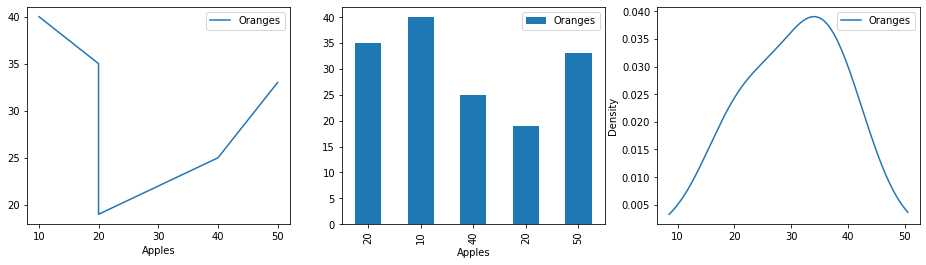

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)  # at minimu, x= must be ordered
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)  # bar doesn't require the ordred x=
df.plot(x='Apples', kind='kde', ax=ax3)

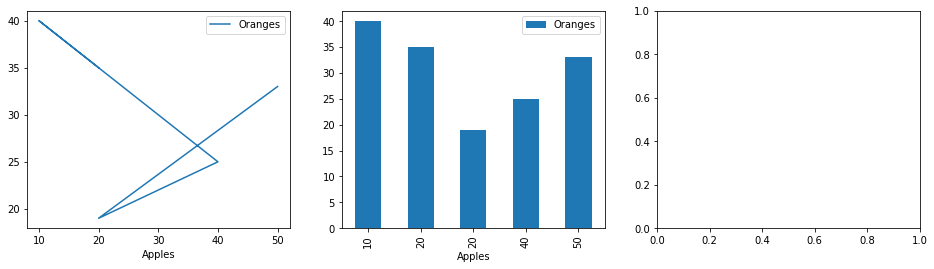

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.plot(x='Apples', y='Oranges', kind='line', ax=ax1)  # x= is not ordered
df.sort_values("Apples").plot(x='Apples', y='Oranges', kind='bar', ax=ax2)  # orderd x= imposed

In [40]:
uploaded = files.upload()

Saving flights.csv to flights (1).csv


In [41]:
flights = pd.read_csv('flights.csv')
print(flights.shape)
print(flights.columns)
flights.head()

(58492, 14)
Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [42]:
flights['ARR_DELAY']

0        65.0
1       -13.0
2        35.0
3        -7.0
4        39.0
         ... 
58487   -19.0
58488     4.0
58489    -5.0
58490    34.0
58491    -1.0
Name: ARR_DELAY, Length: 58492, dtype: float64

In [43]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15)  # ge(): greater than # the output as truth values
tmp = flights[['ARR_DELAY','DELAYED']]
tmp.head()

,ARR_DELAY,DELAYED
0,65.0,True
1,-13.0,False
2,35.0,True
3,-7.0,False
4,39.0,True


In [44]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)  # convert into integer (0,1) for (False, Truth)
tmp = flights[['ARR_DELAY','DELAYED']]
tmp.head()

,ARR_DELAY,DELAYED
0,65.0,1
1,-13.0,0
2,35.0,1
3,-7.0,0
4,39.0,1


In [10]:
# df.any()  # Return whether any element is True, potentially over an axis

In [45]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['NEG'] = flights[cols].any(axis=1)  # return True or False
flights['ON_TIME'] = 1 - flights['NEG']  # truth values as part of calculation
cols.append('NEG')
cols.append('ON_TIME')
flights[cols].tail()

,DIVERTED,CANCELLED,DELAYED,NEG,ON_TIME
58487,0,0,0,False,1
58488,0,0,0,False,1
58489,0,0,0,False,1
58490,0,0,1,True,0
58491,0,0,0,False,1


In [46]:
status = flights[cols].sum()
print(type(status))
print(status)

<class 'pandas.core.series.Series'>
DIVERTED       137
CANCELLED      881
DELAYED      11685
NEG          12703
ON_TIME      45789
dtype: int64


In [47]:
ac = flights['AIRLINE'].value_counts()  # select distinct (count(*)) group by AIRLINE order by AIRLINE desc
print(type(ac))  # SERIES
print(ac) # descending order by default
ac = flights['AIRLINE'].unique()  # count of unique values
ac

<class 'pandas.core.series.Series'>
DL    10601
AA     8900
WN     8418
UA     7792
OO     6588
EV     5858
MQ     3471
US     1615
NK     1516
F9     1317
VX      993
AS      768
B6      543
HA      112
Name: AIRLINE, dtype: int64


array(['WN', 'UA', 'MQ', 'AA', 'F9', 'EV', 'OO', 'NK', 'US', 'AS', 'DL',
       'VX', 'B6', 'HA'], dtype=object)

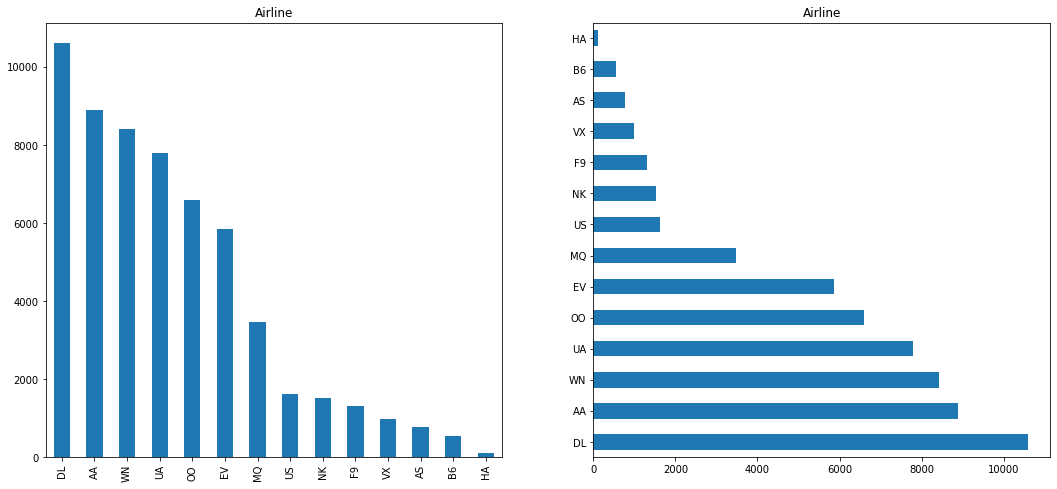

In [48]:
fig, ax_array = plt.subplots(1, 2, figsize=(18,8))
(ax1, ax2) = ax_array

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='bar', ax=ax1, title ='Airline')  # in descending order

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax2, title ='Airline') # in ascending order

NameError: ignored

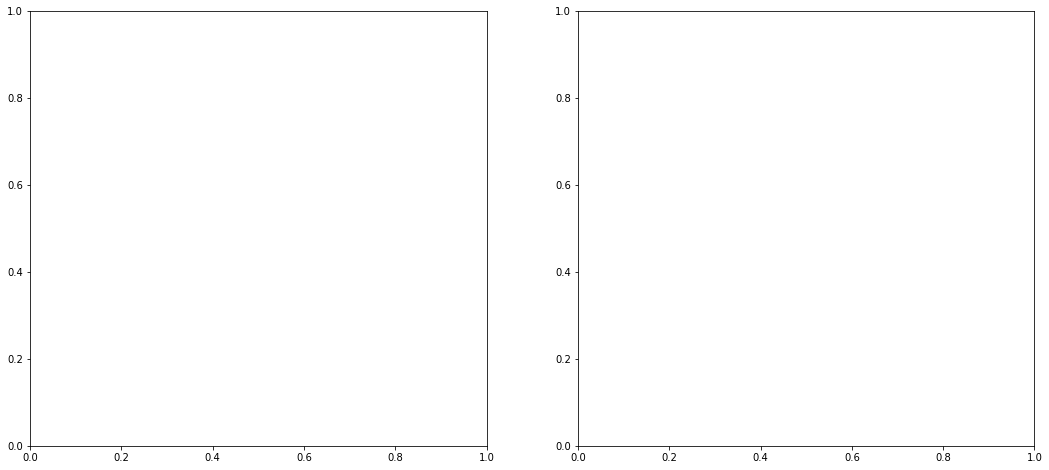

In [15]:
fig, ax_array = plt.subplots(1, 2, figsize=(18,8))
(ax1, ax2) = ax_array

ac = df['Apples'].value_counts()
ac.plot(kind='bar', ax=ax1, title ='Apples')  # always, follows the index

ac = df['Apples'].value_counts()
ac.plot(kind='barh', ax=ax2, title ='Apples') # 'reverse' of bar

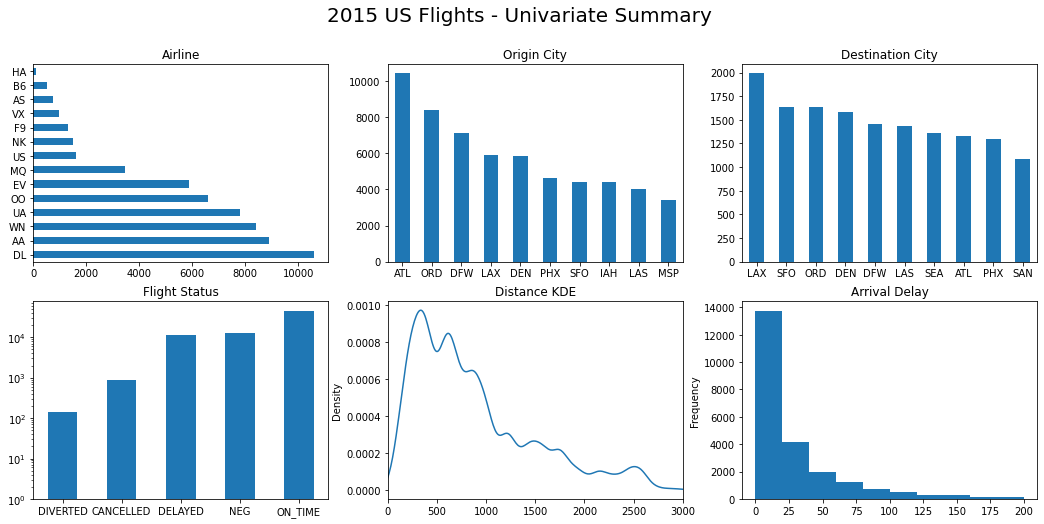

In [49]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')

flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000), title='Distance KDE')

flights['ARR_DELAY'].plot(kind='hist', ax=ax6, title='Arrival Delay', range=(0,200))

In [50]:
flights['ARR_DELAY']

0        65.0
1       -13.0
2        35.0
3        -7.0
4        39.0
         ... 
58487   -19.0
58488     4.0
58489    -5.0
58490    34.0
58491    -1.0
Name: ARR_DELAY, Length: 58492, dtype: float64

In [51]:
flights['ARR_DELAY'].describe()

count    57474.000000
mean         5.812315
std         38.411948
min        -60.000000
25%        -12.000000
50%         -4.000000
75%          9.000000
max       1185.000000
Name: ARR_DELAY, dtype: float64

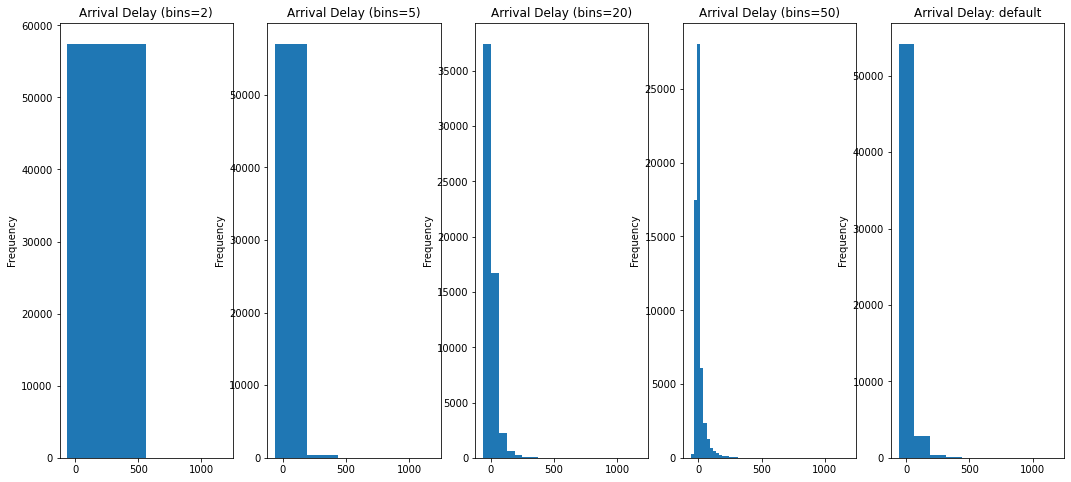

In [52]:
fig3, ax_array = plt.subplots(1, 5, figsize=(18,8))
ax1, ax2, ax3, ax4, ax5 = ax_array  # (ax1, ax2, ax3, ax4, ax5) = ax_array

# 'bins': from min to max / divided by the desire num. of division
# 'bins': ranking representing underlying values

flights['ARR_DELAY'].plot(kind='hist', ax=ax1, title='Arrival Delay (bins=2)', bins=2) 
flights['ARR_DELAY'].plot(kind='hist', ax=ax2, title='Arrival Delay (bins=5)', bins=5)
flights['ARR_DELAY'].plot(kind='hist', ax=ax3, title='Arrival Delay (bins=20)', bins=20)
flights['ARR_DELAY'].plot(kind='hist', ax=ax4, title='Arrival Delay (bins=50)', bins=50)
flights['ARR_DELAY'].plot(kind='hist', ax=ax5, title='Arrival Delay: default')  # no bins, no range # default descripiton # what is the max?

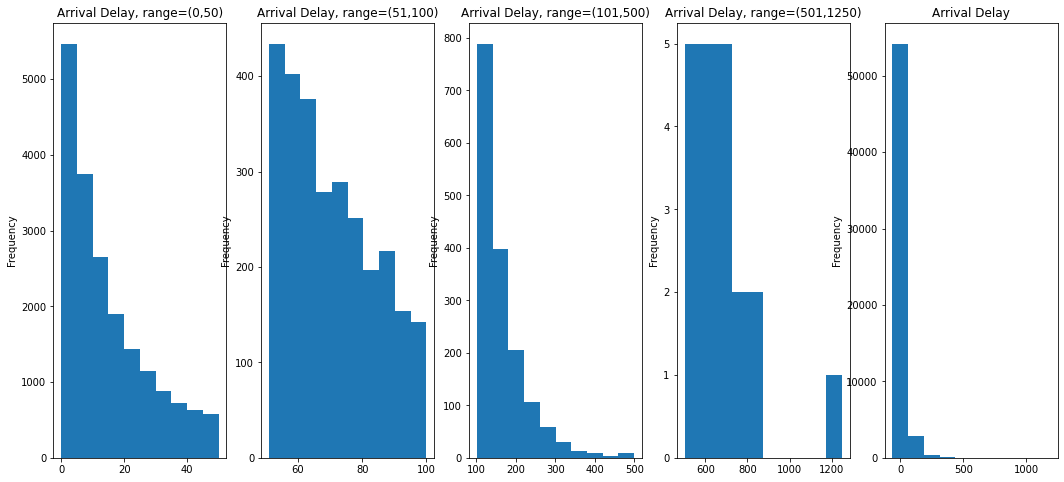

In [53]:
fig3, ax_array = plt.subplots(1, 5, figsize=(18,8))
ax1, ax2, ax3, ax4, ax5 = ax_array  # (ax1, ax2, ax3, ax4, ax5) = ax_array

# range:  with the max number present with default graph (no bins, no range)
# range:  indicate the values -- poss elimination of outliers within each range

flights['ARR_DELAY'].plot(kind='hist', ax=ax1, title='Arrival Delay, range=(0,50)', range=(0,50))   
flights['ARR_DELAY'].plot(kind='hist', ax=ax2, title='Arrival Delay, range=(51,100)', range=(51,100))   
flights['ARR_DELAY'].plot(kind='hist', ax=ax3, title='Arrival Delay, range=(101,500)', range=(101,500))    
flights['ARR_DELAY'].plot(kind='hist', ax=ax4, title='Arrival Delay, range=(501,1250)', range=(501,1250))   
flights['ARR_DELAY'].plot(kind='hist', ax=ax5, title='Arrival Delay')

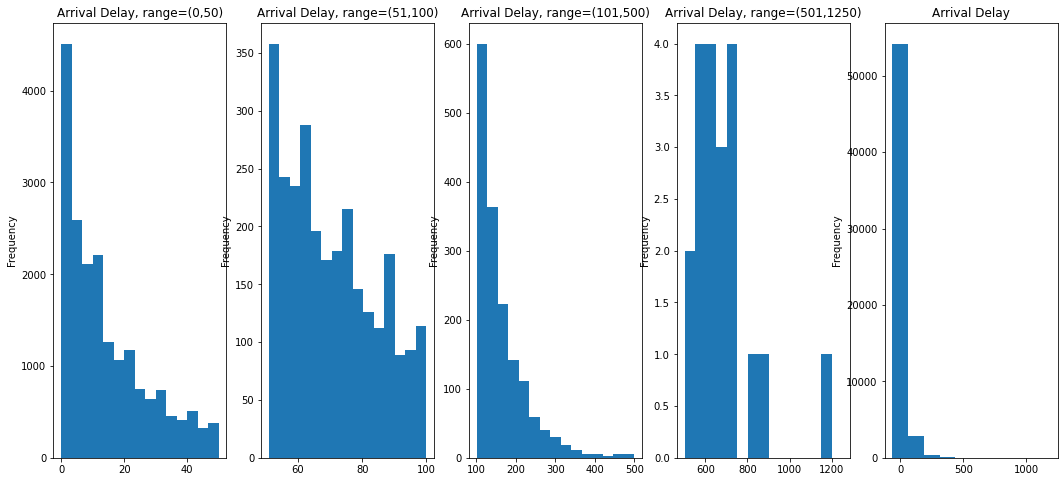

In [54]:
fig3, ax_array = plt.subplots(1, 5, figsize=(18,8))
ax1, ax2, ax3, ax4, ax5 = ax_array  # (ax1, ax2, ax3, ax4, ax5) = ax_array

# range:  with the max number present with default graph (no bins, no range)
# range:  indicate the values -- poss elimination of outliers within each range

flights['ARR_DELAY'].plot(kind='hist', ax=ax1, title='Arrival Delay, range=(0,50)', range=(0,50), bins=15)   
flights['ARR_DELAY'].plot(kind='hist', ax=ax2, title='Arrival Delay, range=(51,100)', range=(51,100), bins=15)   
flights['ARR_DELAY'].plot(kind='hist', ax=ax3, title='Arrival Delay, range=(101,500)', range=(101,500), bins=15)    
flights['ARR_DELAY'].plot(kind='hist', ax=ax4, title='Arrival Delay, range=(501,1250)', range=(501,1250), bins=15)   
flights['ARR_DELAY'].plot(kind='hist', ax=ax5, title='Arrival Delay')

In [55]:
flights['DIST']

0         590
1        1452
2         641
3        1192
4        1363
         ... 
58487    1464
58488     414
58489     262
58490     907
58491     522
Name: DIST, Length: 58492, dtype: int64

In [56]:
flights['DIST'].describe()

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

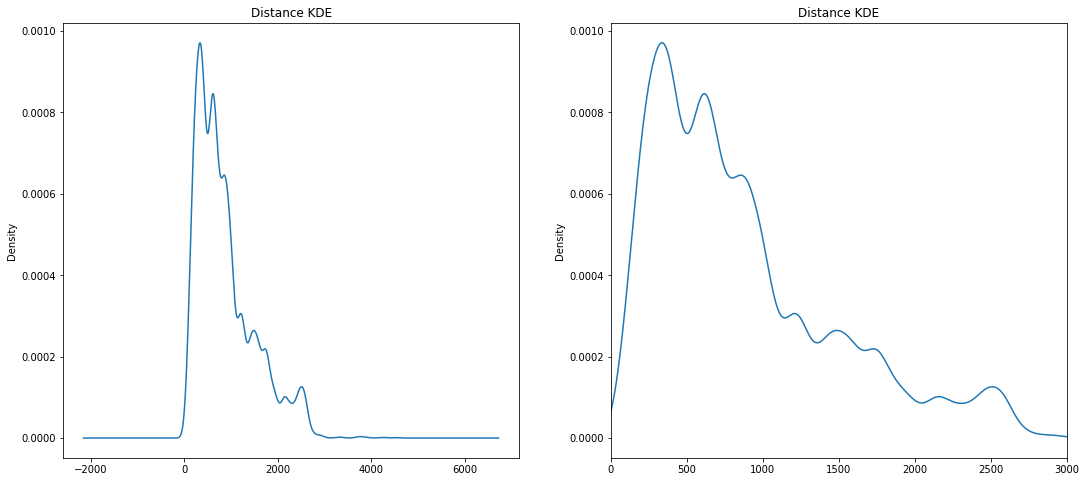

In [57]:
fig4, ax_array = plt.subplots(1, 2, figsize=(18,8))
ax1, ax2 = ax_array  # (ax1, ax2) = ax_array
 
flights['DIST'].plot(kind='kde', ax=ax1, title='Distance KDE') # no xlim # but where are the x values comging from?
flights['DIST'].plot(kind='kde', ax=ax2, xlim=(0, 3000), title='Distance KDE')  

In [58]:
print(flights['SCHED_DEP'])
flights['SCHED_DEP'].describe()

0        1625
1         823
2        1305
3        1555
4        1720
         ... 
58487     515
58488    1910
58489    1846
58490     525
58491     859
Name: SCHED_DEP, Length: 58492, dtype: int64


count    58492.000000
mean      1387.984836
std        482.810792
min          5.000000
25%       1000.000000
50%       1353.000000
75%       1805.000000
max       2359.000000
Name: SCHED_DEP, dtype: float64

In [59]:
# df.assign() # Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.
hour = flights['SCHED_DEP'] // 100  # get those integer value above the decimal point
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [60]:
flight_dep = pd.to_datetime(df_date)  # pd.to_datetime() # df_date, a DataFrame, must have those FIVE columns
print(type(flight_dep))  # Sereis
flight_dep.head()

<class 'pandas.core.series.Series'>


0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

In [61]:
print(flights.shape)
print(flights.head(5))
flights.index = flight_dep # must be run before running DF.resample()
print(flights.head(5))


(58492, 17)
   MONTH  DAY  WEEKDAY AIRLINE  ... CANCELLED DELAYED    NEG  ON_TIME
0      1    1        4      WN  ...         0       1   True        0
1      1    1        4      UA  ...         0       0  False        1
2      1    1        4      MQ  ...         0       1   True        0
3      1    1        4      AA  ...         0       0  False        1
4      1    1        4      WN  ...         0       1   True        0

[5 rows x 17 columns]
                     MONTH  DAY  WEEKDAY  ... DELAYED    NEG ON_TIME
2015-01-01 16:25:00      1    1        4  ...       1   True       0
2015-01-01 08:23:00      1    1        4  ...       0  False       1
2015-01-01 13:05:00      1    1        4  ...       1   True       0
2015-01-01 15:55:00      1    1        4  ...       0  False       1
2015-01-01 17:20:00      1    1        4  ...       1   True       0

[5 rows x 17 columns]
pandas.core.resample.DatetimeIndexResampler


In [63]:
fc = flights.resample('W')
print(type(fc))  

pandas.core.resample.DatetimeIndexResampler


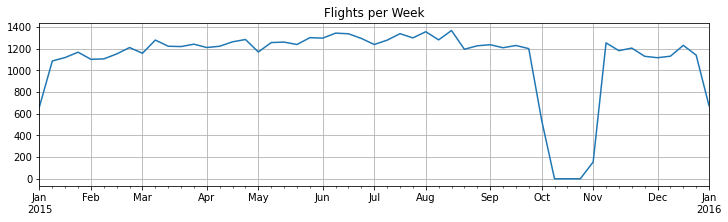

In [67]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)